In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as  mpl
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation
import IPython.display as display

mpl.rcParams['animation.ffmpeg_path'] = r'E:\\Program Files\\ffmpeg-7.1-full_build\\bin\\ffmpeg.exe'

plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm", "font.size": 8})
plt.style.use("dark_background")

In [2]:
p = 1
d = 1
cos = np.cos
sin = np.sin

@np.vectorize
def sigma_induced(y, z, alpha):
    r = np.sqrt(y**2 + z**2 + d**2)
    return -p / (4 * np.pi) * r**(-5) * (6*d * (y*cos(alpha) + d*sin(alpha)) + 2*r**2 * sin(alpha))

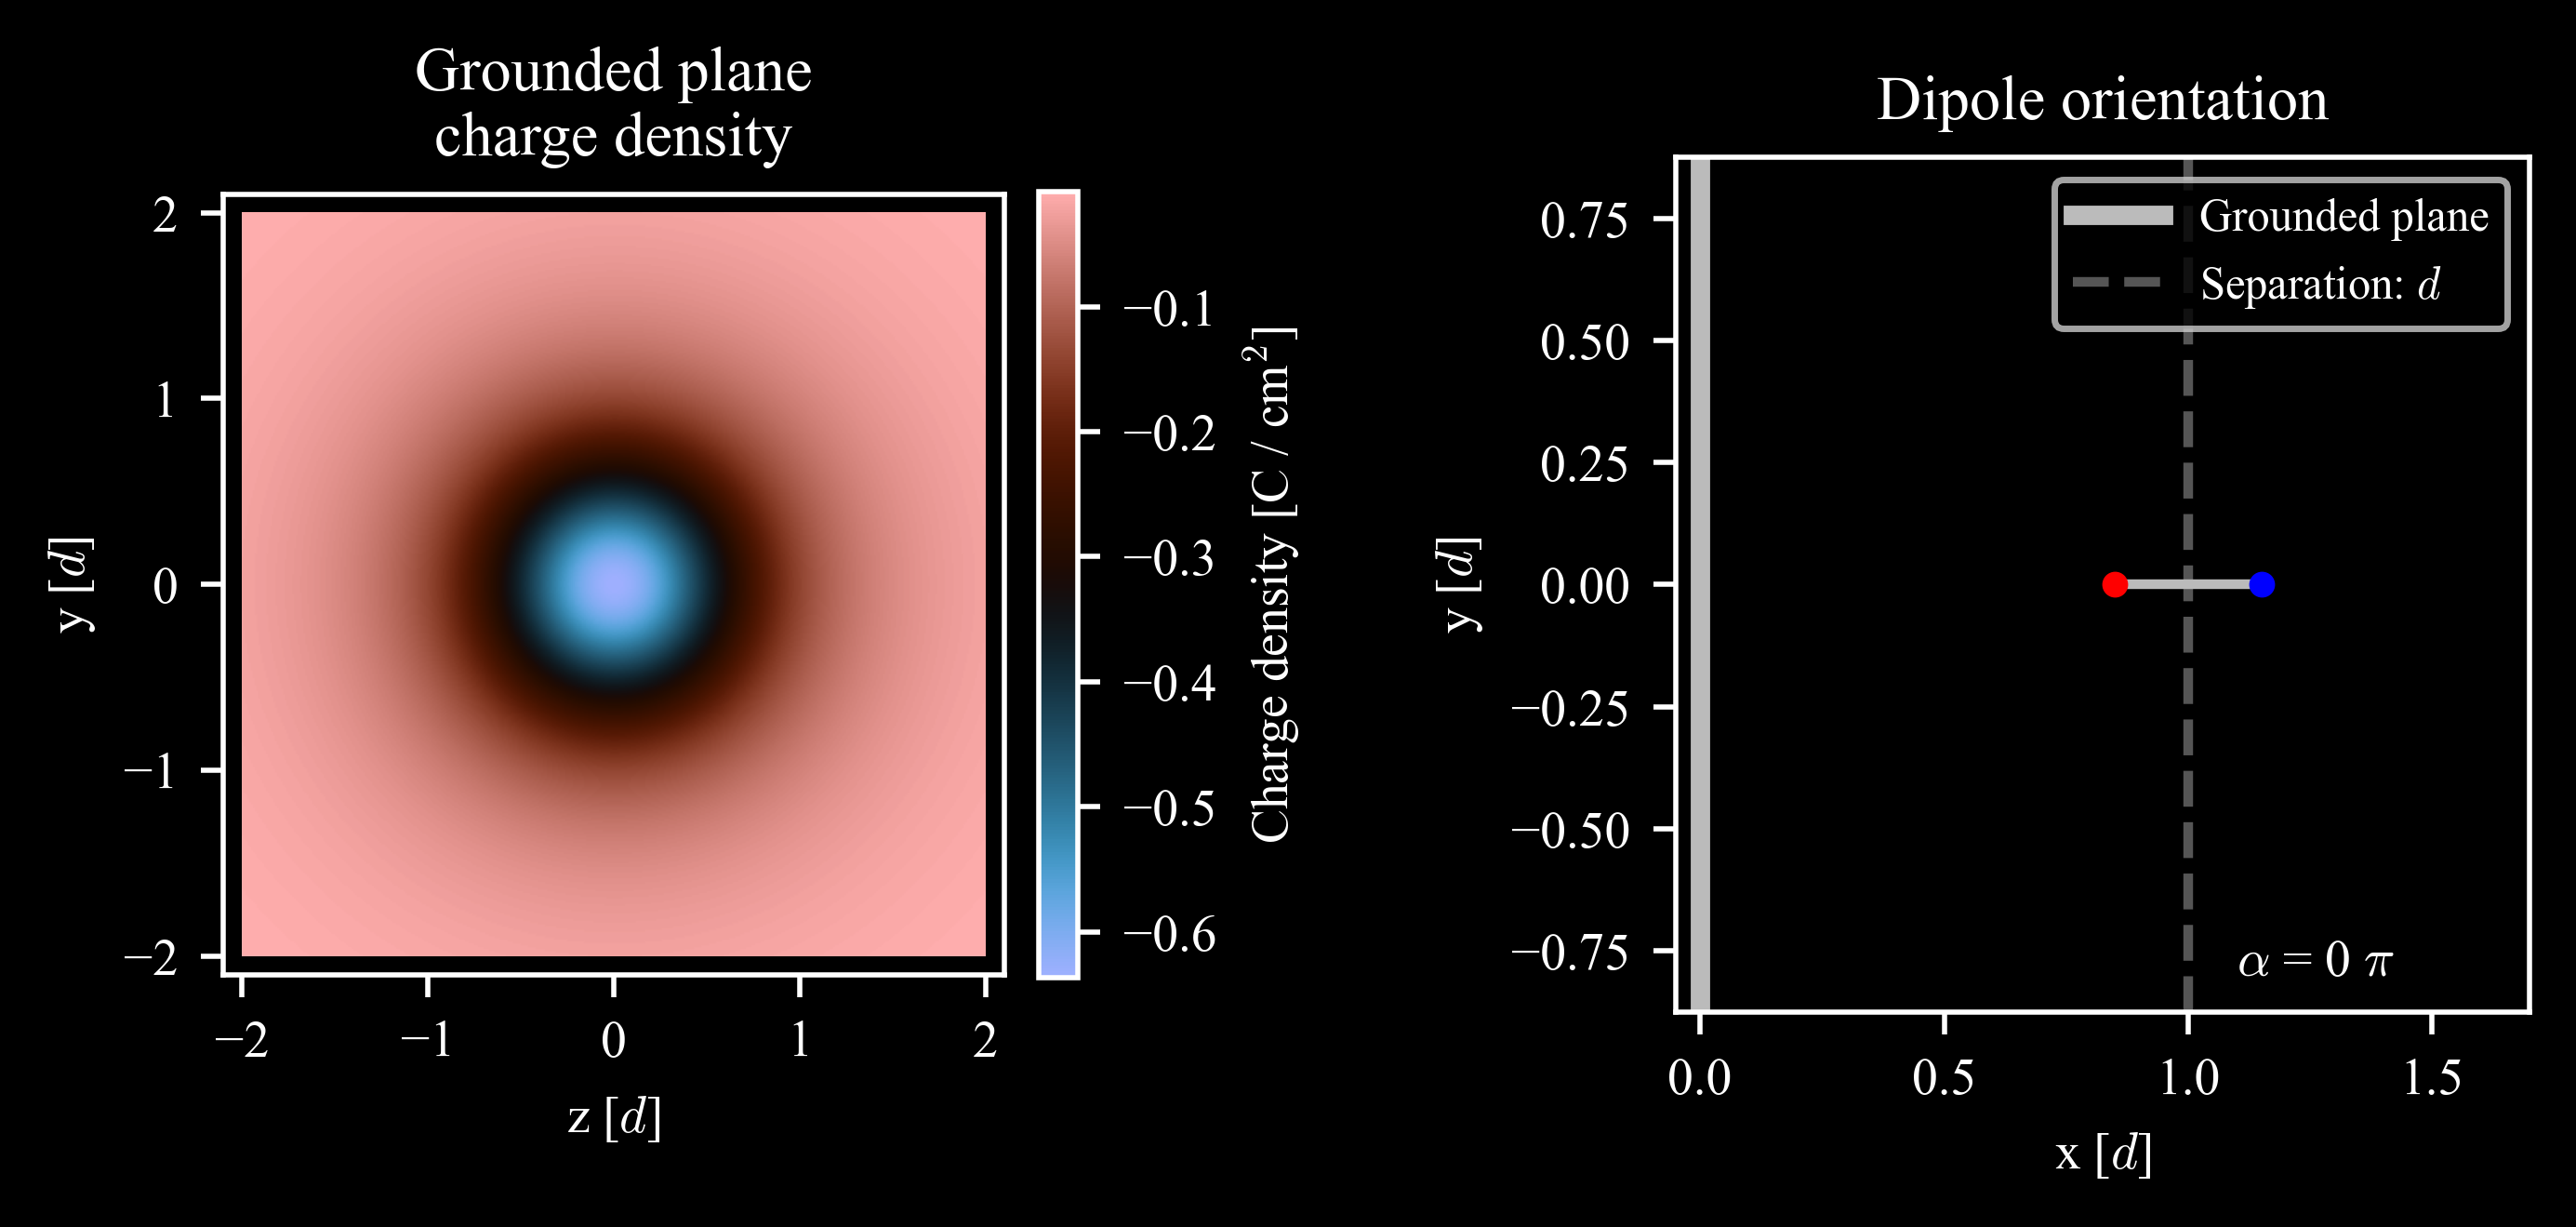

In [3]:
alpha = np.pi/2

fig, axs = plt.subplot_mosaic([["sigma", "dipole"]], dpi=500)
side_length = 2
side_step = 0.01
Y, Z = np.mgrid[side_length:-(side_length+side_step):-side_step, -side_length:side_length:side_step]

# Dipole orientation
def get_dipole(alpha):
    scaling = 0.3
    x, y = d + scaling*sin(alpha)/2, -scaling*cos(alpha)/2
    u, v = d - scaling*sin(alpha)/2, scaling*cos(alpha)/2
    return x, y, u, v
x, y, u, v = get_dipole(alpha)

sc1 = axs["dipole"].scatter(x, y, color="b", zorder=1, marker=".")
sc2 = axs["dipole"].scatter(u, v, color="r", zorder=1, marker=".")
line, = axs["dipole"].plot((x, u), (y, v), color="#bbb", zorder=0)
axs["dipole"].plot((0, 0), (-2, 2), color="#bbb", lw=3, zorder=0, label="Grounded plane")
axs["dipole"].set(xlim=(-0.05, 1.7), ylim=(-0.875, 0.875),
                  xlabel="x [$d$]", ylabel="y [$d$]", title="Dipole orientation")
axs["dipole"].axvline(d, color="#555", zorder=-1, ls='--', label="Separation: $d$")
text = axs["dipole"].text(1.1, -0.8, "$\\alpha$ = 0 $\\pi$")

axs["dipole"].set_aspect(1.0/axs["dipole"].get_data_ratio(), adjustable='box')
axs["dipole"].legend(fontsize=7)


# YZ charge density
im = axs["sigma"].imshow(sigma_induced(Y, Z, alpha), cmap=plt.cm.berlin, extent=(-side_length, side_length, -side_length, side_length))
axs["sigma"].set(xlim=(-2.1, 2.1), ylim=(-2.1, 2.1),
                 xlabel="z [$d$]", ylabel="y [$d$]", title="Grounded plane\ncharge density")
fig.colorbar(im, label="Charge density [C / cm$^2$]", fraction=0.046, pad=0.04)

plt.subplots_adjust(wspace=0.7)

In [4]:
total_frames = 120
fps = 30
def animate(frame):
    print(f"Progress: {100*(frame+1)/total_frames:.2f}%")
    
    alpha = np.pi/2 + (frame/total_frames) * 4 * np.pi
    x, y, u, v = get_dipole(alpha)
    sc1.set_offsets([[x, y]])
    sc2.set_offsets([[u, v]])
    text.set_text(f"$\\alpha$ = {alpha/np.pi:.1f} $\\pi$")
    
    axs["sigma"].imshow(sigma_induced(Y, Z, alpha), cmap=plt.cm.berlin, extent=(-side_length, side_length, -side_length, side_length))
    line.set_data((u, x), (v, y))

animation = FuncAnimation(fig, animate, frames=total_frames, interval=1000/fps, repeat=False)
animation.save("dipole.mp4", writer="ffmpeg", fps=fps)

Progress: 0.83%
Progress: 0.83%
Progress: 1.67%
Progress: 2.50%
Progress: 3.33%
Progress: 4.17%
Progress: 5.00%
Progress: 5.83%
Progress: 6.67%
Progress: 7.50%
Progress: 8.33%
Progress: 9.17%
Progress: 10.00%
Progress: 10.83%
Progress: 11.67%
Progress: 12.50%
Progress: 13.33%
Progress: 14.17%
Progress: 15.00%
Progress: 15.83%
Progress: 16.67%
Progress: 17.50%
Progress: 18.33%
Progress: 19.17%
Progress: 20.00%
Progress: 20.83%
Progress: 21.67%
Progress: 22.50%
Progress: 23.33%
Progress: 24.17%
Progress: 25.00%
Progress: 25.83%
Progress: 26.67%
Progress: 27.50%
Progress: 28.33%
Progress: 29.17%
Progress: 30.00%
Progress: 30.83%
Progress: 31.67%
Progress: 32.50%
Progress: 33.33%
Progress: 34.17%
Progress: 35.00%
Progress: 35.83%
Progress: 36.67%
Progress: 37.50%
Progress: 38.33%
Progress: 39.17%
Progress: 40.00%
Progress: 40.83%
Progress: 41.67%
Progress: 42.50%
Progress: 43.33%
Progress: 44.17%
Progress: 45.00%
Progress: 45.83%
Progress: 46.67%
Progress: 47.50%
Progress: 48.33%
Progress:

In [5]:
video = animation.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

Progress: 0.83%
Progress: 0.83%
Progress: 1.67%
Progress: 2.50%


KeyboardInterrupt: 